# **Imports:**

In [123]:
# Put all needed libraries here.
import kagglehub
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Install and Import Required Libraries
!pip install scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import (
    mutual_info_regression,  # Information Gain
    chi2,                    # Chi-square Test
    f_classif,               # ANOVA (F-test)
    SelectKBest,             # Select top k features
    VarianceThreshold        # Variance Threshold
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Loading Dataset:**

In [7]:
# Loading our dataset
# Follow this Link to download and use the dataset: https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers/data
# Apply the following model to classify if the customer left the bank or not? --> Target Variable: exited
import kagglehub
import os
import pandas as pd

# Download dataset
path = kagglehub.dataset_download("adammaus/predicting-churn-for-bank-customers")

# List available files
print("Files in Directory:", os.listdir(path))

# Correct file path
csv_file = os.path.join(path, "Churn_Modelling.csv")

# Load the dataset
data = pd.read_csv(csv_file)


Files in Directory: ['Churn_Modelling.csv']


In [55]:
feature_names = data.columns.tolist()
print(feature_names)


['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [84]:
# Do all the pre-processing.
X = data.drop(columns=["Exited"])
y = data["Exited"]
y_bin = y.copy()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Standardize features
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Filter-based features selection techniques:**

**Any Correlation should be done using Pearson and Spearman**

**Question 1:**

What are the most important 4 features for the output?

In [18]:
!pip install skfeature-chappers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 1.8 MB/s eta 0:00:00


In [77]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [78]:
# Scale features to a non-negative range using MinMaxScaler
minmax_scaler = MinMaxScaler()
X_non_negative = minmax_scaler.fit_transform(X)
y_bin = np.where(y > np.median(y), 1, 0)


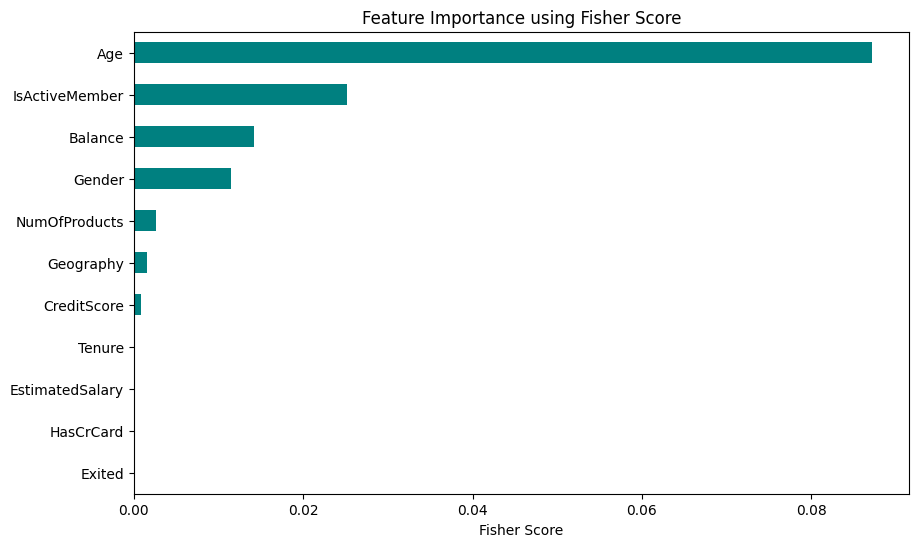

In [88]:
# Measure the feature importnace for all features in your dataset using (Fisher’s Score)
y_train = np.ravel(y_train)

ranks = fisher_score(X_train, y_train)

# Convert to Pandas Series with feature names
feat_importances = pd.Series(ranks, index=feature_names)

# Sort in descending order
feat_importances.sort_values(ascending=False, inplace=True)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh', color='teal')
plt.xlabel("Fisher Score")
plt.title("Feature Importance using Fisher Score")
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
plt.show()


<Axes: >

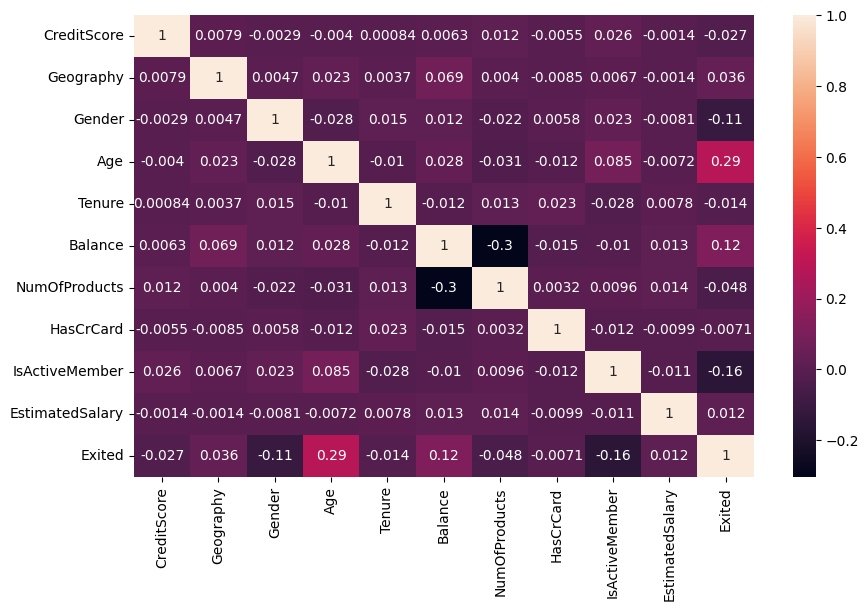

In [89]:
# Measure the feature importnace for all features in your dataset using (Correlation Coefficient)
cor = data.corr()
plt.figure(figsize =(10,6))
sns.heatmap(cor,annot = True)


In [90]:
# Measure the feature importnace for all features in your dataset using (Variance Threshold) --> (Try 3 different thresholds and Compare!)
from sklearn.feature_selection import VarianceThreshold
variance_threshold = VarianceThreshold(threshold=0.1)  # Remove low-variance features sp only high variance remains
X_variance_selected = variance_threshold.fit_transform(X)

# Get selected features
selected_features = variance_threshold.get_support(indices=True)
print("Selected Features (Variance Threshold):", [feature_names[i] for i in selected_features])

Selected Features (Variance Threshold): ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [91]:
variance_threshold = VarianceThreshold(threshold=0.01)  # Remove low-variance features
X_variance_selected = variance_threshold.fit_transform(X)

# Get selected features
selected_features = variance_threshold.get_support(indices=True)
print("Selected Features (Variance Threshold):", [feature_names[i] for i in selected_features])

Selected Features (Variance Threshold): ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [92]:
variance_threshold = VarianceThreshold(threshold=0.001)  # Remove very ow-variance features
X_variance_selected = variance_threshold.fit_transform(X)

# Get selected features
selected_features = variance_threshold.get_support(indices=True)
print("Selected Features (Variance Threshold):", [feature_names[i] for i in selected_features])

Selected Features (Variance Threshold): ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


**Question 2:**

Are there any features taht are dependent on each other?

In [107]:
print(X.shape[1], len(feature_names))


10 11


In [108]:
feature_names = X.columns.tolist()


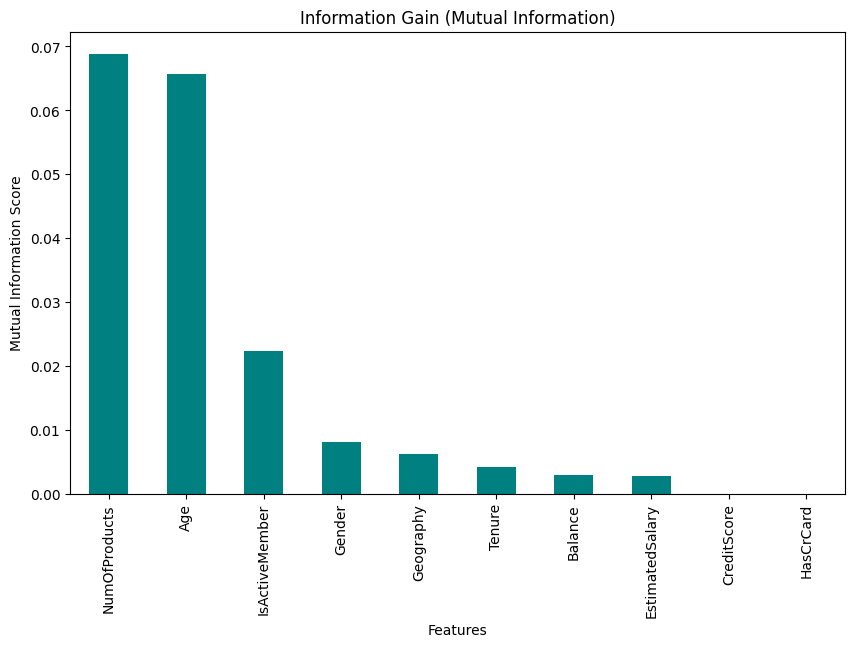

In [109]:
# Write your code to acieve the answer here.
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=feature_names)
mi_scores.sort_values(ascending=False, inplace=True)

# Plot Information Gain
plt.figure(figsize=(10, 6))
mi_scores.plot(kind="bar", color="teal")
plt.title("Information Gain (Mutual Information)")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.show()

**Question 3:**

From Question 1, Have you found the most correlated feature withe target variable? Now find the most correlated 3 features with it using Chi-squre Test Scores.

In [122]:
# Write your code to acieve the answer here.

minmax_scaler = MinMaxScaler()
X_non_negative = minmax_scaler.fit_transform(X)

y_bin = np.where(y > np.median(y), 1, 0)  # Convert to binary classification

# Compute Chi-square scores
chi2_scores, _ = chi2(X_non_negative, y_bin)


In [119]:
feature_names = X.columns.tolist()
chi2_scores = pd.Series(chi2_scores, index=feature_names)
chi2_scores.sort_values(ascending=False, inplace=True)

# Select top 3 correlated features
top_3_features = chi2_scores.head(3).index.tolist()
print("Top 3 Features (Chi-square):", top_3_features)


Top 3 Features (Chi-square): ['IsActiveMember', 'Age', 'Gender']


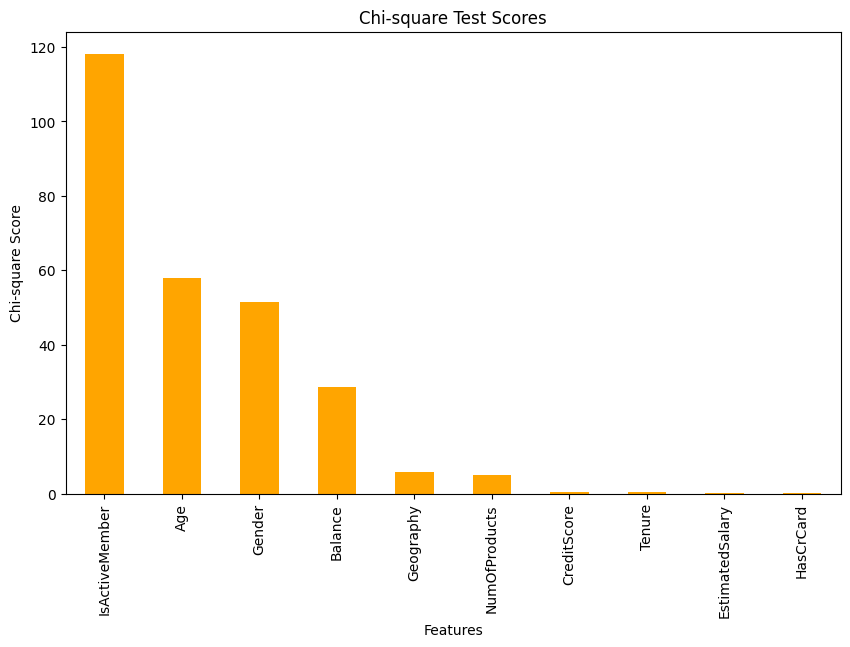

In [121]:
plt.figure(figsize=(10, 6))
chi2_scores.plot(kind="bar", color="orange")
plt.title("Chi-square Test Scores")
plt.xlabel("Features")
plt.ylabel("Chi-square Score")
plt.show()

**Question 4:**

From Questions 1, and 3; How many features do you have now as outputs? Use them (instead of all features) to re-build the previous 3 models.

In [116]:
from sklearn.neural_network import MLPClassifier


In [124]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_bin, test_size=0.2, random_state=42)

# Define models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42),
    "Logistic Regression": LogisticRegression()
}

# Train and Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")



KNN Accuracy: 0.8060
Neural Network Accuracy: 0.8190
Logistic Regression Accuracy: 0.8105


# **Learning Curve**

##**Learning Curve for KNN:**


In [33]:
from sklearn.model_selection import learning_curve
model = KNeighborsClassifier(n_neighbors=5)
train_sizes, train_scores_lc, test_scores_lc = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

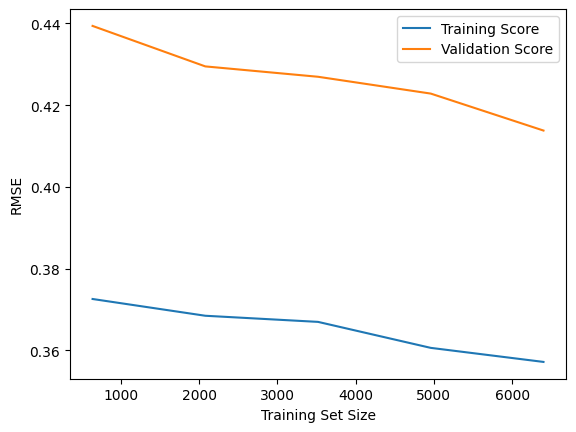

In [34]:
# Plot learning curve
plt.plot(train_sizes, -train_scores_lc.mean(axis=1), label='Training Score')
plt.plot(train_sizes, -test_scores_lc.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

**Explain The Result:**

Overfit

##**Learning Curve for Logestic Regression:**

In [35]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(max_iter=1000)

train_sizes, train_scores_lc, test_scores_lc = learning_curve(
    estimator=model_log,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

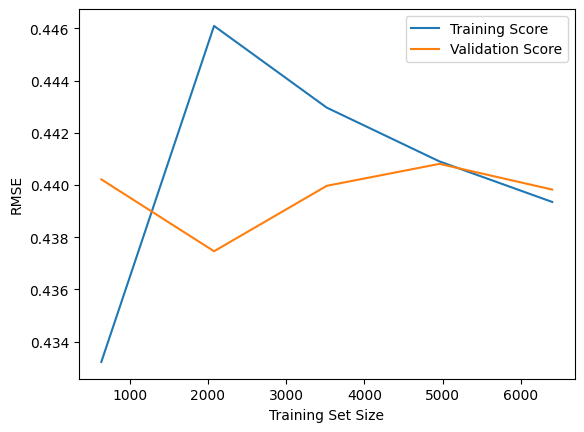

In [36]:
# Plot learning curve
plt.plot(train_sizes, -train_scores_lc.mean(axis=1), label='Training Score')
plt.plot(train_sizes, -test_scores_lc.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

**Explain The Result:**

Good fit

##**Learning Curve for Neural Network:**

In [37]:
from sklearn.neural_network import MLPRegressor

model_nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

train_sizes, train_scores_lc, test_scores_lc = learning_curve(
    estimator=model_nn,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

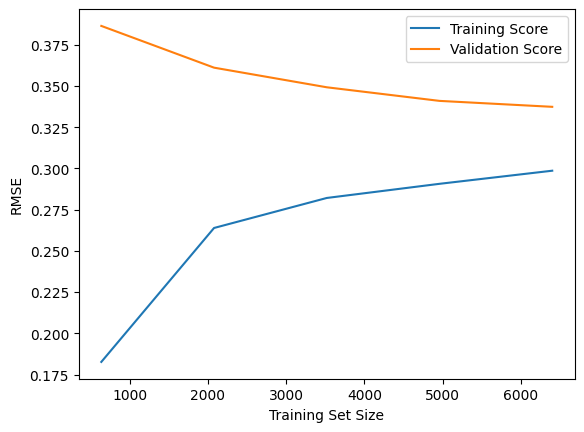

In [38]:
plt.plot(train_sizes, -train_scores_lc.mean(axis=1), label='Training Score')
plt.plot(train_sizes, -test_scores_lc.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

**Explain The Result:**

Good fit

# **Validation Curve:**

##**Validation Curve for KNN:**

In [39]:
param_range = np.arange(1, 20)
train_scores_vc, test_scores_vc = validation_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    param_name='n_neighbors',
    param_range=param_range,
    cv=5,
    scoring='neg_root_mean_squared_error',
)

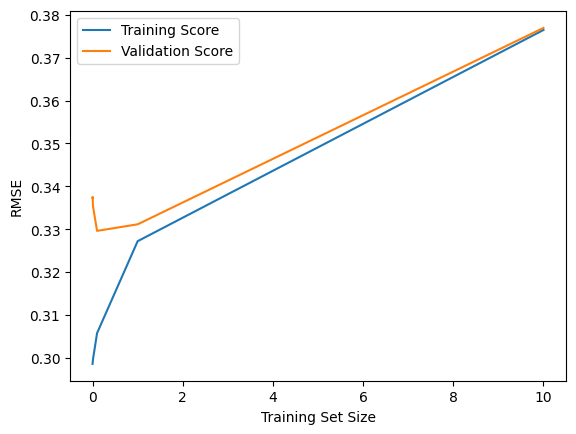

In [47]:
plt.plot(param_range, -train_scores_vc.mean(axis=1), label='Training Score')
plt.plot(param_range, -test_scores_vc.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

**Explain The Result:**

Underfit

##**Validation Curve for Logetstic Regression:**

In [93]:
train_scores_vc, test_scores_vc = validation_curve(
    estimator=model_log,
    X=X_train,
    y=y_train,
    param_name='C',
    param_range=param_range,
    cv=5,
    scoring='neg_root_mean_squared_error',
)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

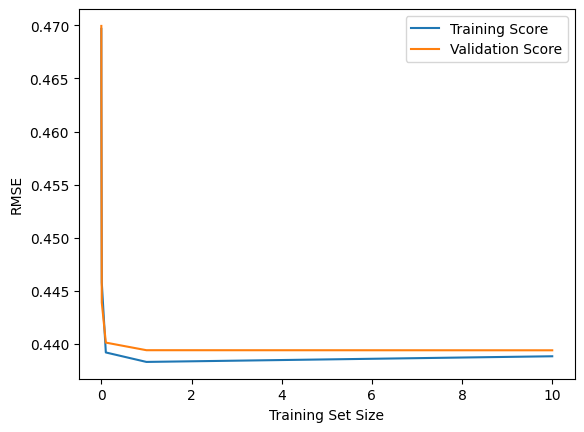

In [94]:
plt.plot(param_range, -train_scores_vc.mean(axis=1), label='Training Score')
plt.plot(param_range, -test_scores_vc.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

**Explain The Result:**

Underfit

##**Validation Curve for NN:**

In [95]:
param_range = np.logspace(-4, 1, 6)
train_scores_vc, test_scores_vc = validation_curve(
    estimator=model_nn,
    X=X_train,
    y=y_train,
    param_name='alpha',
    param_range=param_range,
    cv=5,
    scoring='neg_root_mean_squared_error',
)

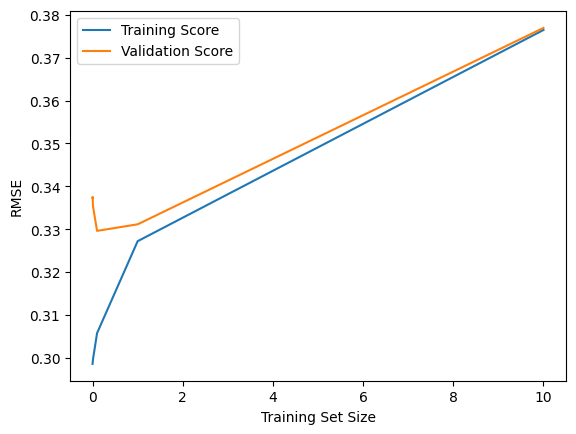

In [41]:
plt.plot(param_range, -train_scores_vc.mean(axis=1), label='Training Score')
plt.plot(param_range, -test_scores_vc.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

**Explain The Result:**

Underfit

# **Confusion Matrix:**

##**Confusion Matrix for KNN:**

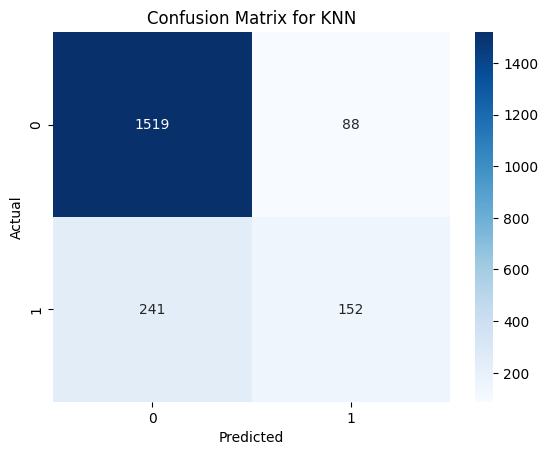

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()


- How many True Negatives? - What does this number mean?

TN: it is supposed to be true but the model predicted it wrong (False)



##**Confusion Matrix for Logetstic Regression:**

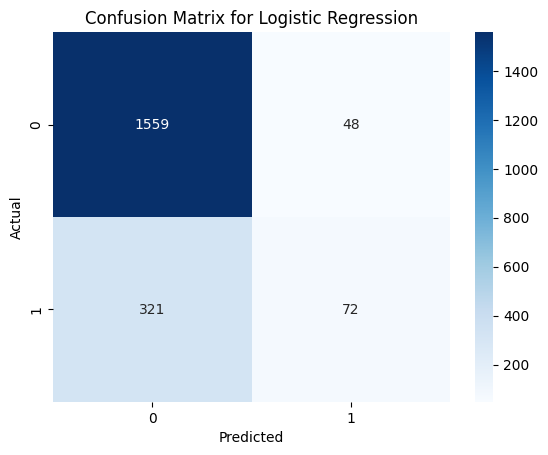

In [43]:
model_log.fit(X_train, y_train)
y_pred = model_log.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


- How many False Positives?  What does this number mean?

##**Confusion Matrix for NN:**

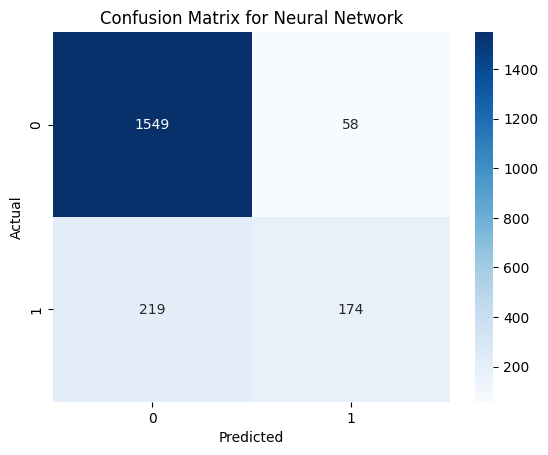

In [44]:
# Train the Neural Network model
model_nn.fit(X_train, y_train)

# Predict the labels for test data
y_pred = (model_nn.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network')
plt.show()


- How many False Negatives?  What does this number mean?

#**Compute F1-Score for all models:**

In [45]:
from sklearn.metrics import f1_score
# Compute F1 scores
f1_knn = f1_score(y_test, model.predict(X_test))
f1_log = f1_score(y_test, model_log.predict(X_test))
f1_nn = f1_score(y_test, (model_nn.predict(X_test) > 0.5).astype("int32"))

In [46]:
print(f"F1 Score for KNN: {f1_knn:.4f}")
print(f"F1 Score for Logistic Regression: {f1_log:.4f}")
print(f"F1 Score for Neural Network: {f1_nn:.4f}")


F1 Score for KNN: 0.4803
F1 Score for Logistic Regression: 0.2807
F1 Score for Neural Network: 0.5568


## **Receiver Operating Characteristic (ROC) Curve For Logestic Regression:**

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


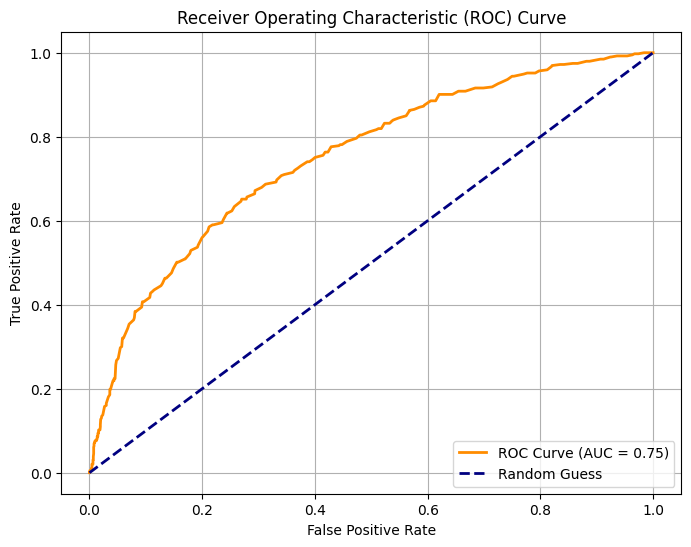

In [126]:
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Diiferntiate between:

- High AUC (close to 1): good model, CAN distinguihes between P and N

- Low AUC (close to 0):useless model

- AUC around 0.5: learn in a wrong patterns, RANDOM
